### 1. Forecast the Airlines Passengers data set
#### Prepare a document for model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.formula.api as smf

In [2]:
# For ignoring some warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
Airlines=pd.read_excel('F:/ExcelR workings/Assignments/Forecasting/Airlines+Data.xlsx')

In [4]:
Airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


### Transformations

In [6]:
Airlines['m_name'] = pd.DatetimeIndex(Airlines['Month']).month
Airlines['year'] = pd.DatetimeIndex(Airlines['Month']).year

In [7]:
import calendar

In [8]:
Airlines['m_name'] = Airlines['m_name'].apply(lambda x: calendar.month_name[x][:3])

In [9]:
Airlines

,Month,Passengers,m_name,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [10]:
airlines=Airlines.copy()

In [11]:
#Create Dummy variables
dummy=pd.DataFrame(pd.get_dummies(Airlines['m_name']))
dummy=dummy[['Jan']+['Feb']+['Mar']+["Apr"]+["May"]+["Jun"]+["Jul"]+["Aug"]+["Sep"]+["Oct"]+["Nov"]+["Dec"]]
Airlines=pd.concat((Airlines,dummy),axis=1)

In [12]:
Airlines

,Month,Passengers,m_name,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
# creating log 
log_Passengers=np.log(Airlines['Passengers'])
Airlines['log_Passengers']=log_Passengers

In [14]:
# Creating variables t and t_square for further processing.
Airlines['t']=range(1,97)
Airlines['t_square']=Airlines['t']*Airlines['t']

In [15]:
Airlines.head()

,Month,Passengers,m_name,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Passengers,t,t_square
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802,3,9
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791,5,25


## Visualizations

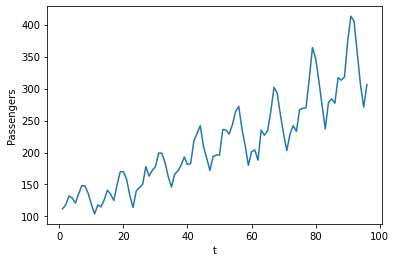

In [16]:
# Line Plot
sns.lineplot(x="t", y="Passengers", data=Airlines)
plt.ylabel("Passengers")
plt.xlabel("t")
plt.show()

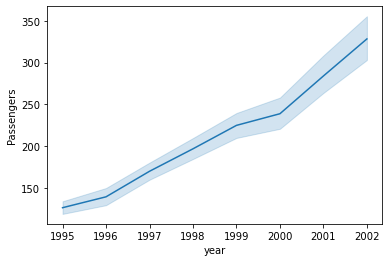

In [17]:
sns.lineplot(x="year", y="Passengers",data=Airlines)
plt.ylabel("Passengers")
plt.xlabel("year")
plt.show()

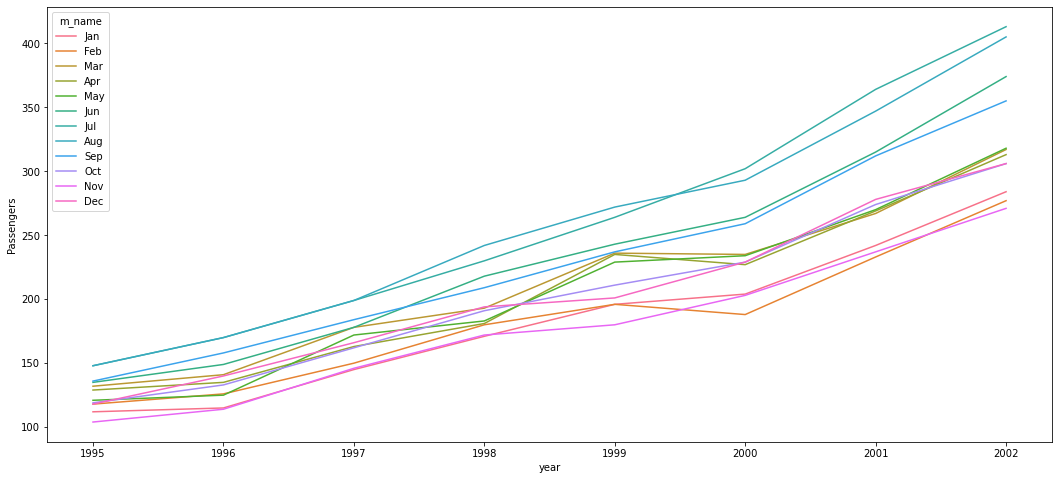

In [18]:
# Line Plot Monthly
plt.figure(figsize=(18,8))
sns.lineplot(x="year", y="Passengers", hue="m_name",data=Airlines)
plt.ylabel("Passengers")
plt.xlabel("year")
plt.show()

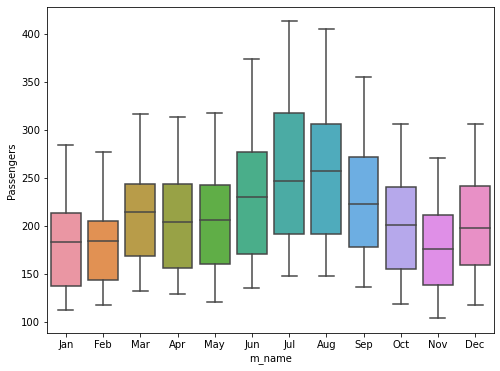

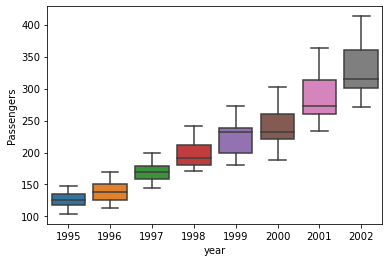

In [19]:
# Box Plots
plt.figure(figsize=(8,6))
sns.boxplot(x="m_name", y="Passengers", data=Airlines)
plt.show()
sns.boxplot(x="year", y="Passengers", data=Airlines)
plt.show()

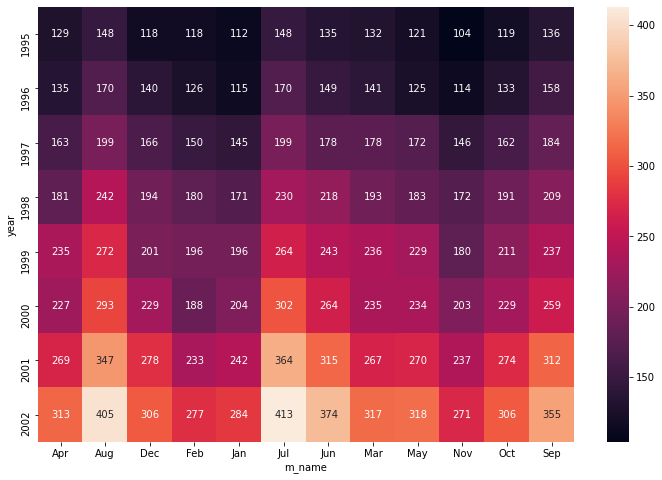

In [20]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month=pd.pivot_table(data=Airlines, values='Passengers', index='year', columns='m_name', aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_y_month,annot=True, fmt='g') # fmt is format for grid values
plt.show()

### Spliting Data

In [21]:
train=Airlines.head(84)
test=Airlines.tail(12)

In [22]:
train

,Month,Passengers,m_name,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Passengers,t,t_square
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802,3,9
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0,5.849325,80,6400
80,2001-09-01,312,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0,5.743003,81,6561
81,2001-10-01,274,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0,5.613128,82,6724
82,2001-11-01,237,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0,5.468060,83,6889


In [23]:
test

,Month,Passengers,m_name,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Passengers,t,t_square
84,2002-01-01,284,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.648974,85,7225
85,2002-02-01,277,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0,5.624018,86,7396
86,2002-03-01,317,Mar,2002,0,0,1,0,0,0,0,0,0,0,0,0,5.758902,87,7569
87,2002-04-01,313,Apr,2002,0,0,0,1,0,0,0,0,0,0,0,0,5.746203,88,7744
88,2002-05-01,318,May,2002,0,0,0,0,1,0,0,0,0,0,0,0,5.762051,89,7921
89,2002-06-01,374,Jun,2002,0,0,0,0,0,1,0,0,0,0,0,0,5.924256,90,8100
90,2002-07-01,413,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448,91,8281
91,2002-08-01,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887,92,8464
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118,93,8649
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585,94,8836


## Forecasting Model Based Methods

#### Linear Model

In [24]:
linear_model=smf.ols('Passengers~t', data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_L=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_L

53.19923653480265

#### Exponential

In [25]:
exp_model=smf.ols('log_Passengers~t', data=train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_E=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_E

46.05736110315619

#### Quadratic

In [26]:
quad_model=smf.ols('Passengers~t+t_square', data=train).fit()
pred_quad=pd.Series(quad_model.predict(test[['t','t_square']]))
rmse_Q=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_Q

48.05188897933154

#### Additive Seasonality

In [27]:
as_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_as=pd.Series(as_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_As=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_as))**2))
rmse_As

132.81978481421814

#### Additive Seasonality with Quadratic

In [28]:
asq_model=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_asq=pd.Series(asq_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_Asq=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_asq))**2))
rmse_Asq

26.360817612081956

#### Multiplicative Seasonality

In [29]:
ms_model=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_ms=pd.Series(ms_model.predict(test))
rmse_ms=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_ms)))**2))
rmse_ms

140.0632020470866

#### Multiplicative Additive Seasonality

In [30]:
mas_model=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_mas=pd.Series(mas_model.predict(test))
rmse_mas=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mas)))**2))
rmse_mas

10.519172544324356

#### Multiplicative Additive Seasonality with Quadratic

In [31]:
masq_model=smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_masq=pd.Series(masq_model.predict(test))
rmse_masq=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_masq)))**2))
rmse_masq

18.372010618133515

In [32]:
# Compare the results
data={"Model Name": pd.Series(['rmse_L','rmse_E','rmse_Q','rmse_As','rmse_Asq','rmse_ms','rmse_mas','rmse_masq']),
                               "RMSE_Values":pd.Series([rmse_L,rmse_E,rmse_Q,rmse_As,rmse_Asq,rmse_ms,rmse_mas,rmse_masq])}

In [33]:
# Creating Table for Comparisons
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model Name,RMSE_Values
6,rmse_mas,10.519173
7,rmse_masq,18.372011
4,rmse_Asq,26.360818
1,rmse_E,46.057361
2,rmse_Q,48.051889
0,rmse_L,53.199237
3,rmse_As,132.819785
5,rmse_ms,140.063202


#### According to above table, we are considering Multiplicative Additive Seasonality Model with lowest RMSE.

## Forecasting Data Driven Model

In [34]:
# Importing liabraries for data driven models
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses
from statsmodels.tsa.holtwinters import Holt as h
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es

In [35]:
# Using same data
Airlines.head()

,Month,Passengers,m_name,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Passengers,t,t_square
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802,3,9
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791,5,25


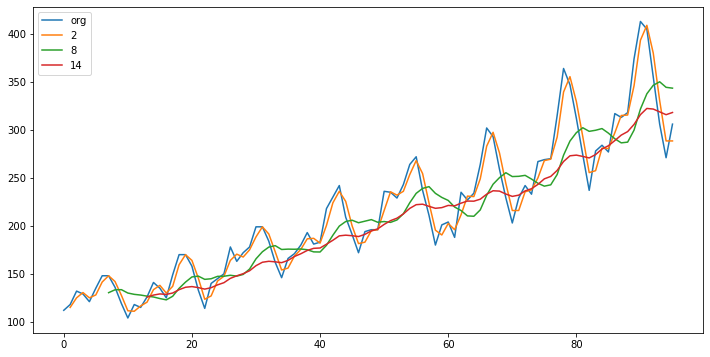

In [36]:
# Visualization for Moving average
plt.figure(figsize=(12,6))
Airlines.Passengers.plot(label="org")
for i in range(2,20,6):
    Airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

#### Time series Decomposition Plots

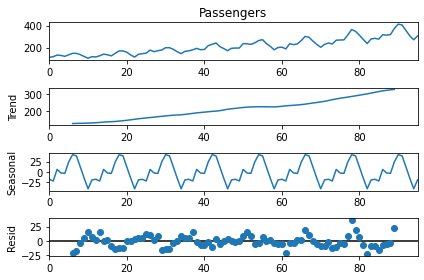

In [37]:
dts=sd(Airlines.Passengers,period=12,model='additive')
dts.plot()
plt.show()

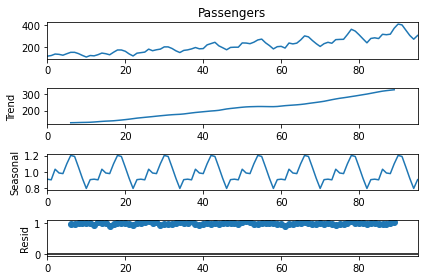

In [38]:
dts=sd(Airlines.Passengers,period=12,model='multiplicative')
dts.plot()
plt.show()

In [39]:
import statsmodels.graphics.tsaplots as tsa_plots

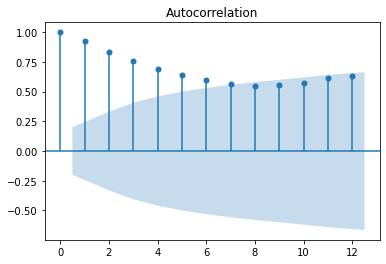

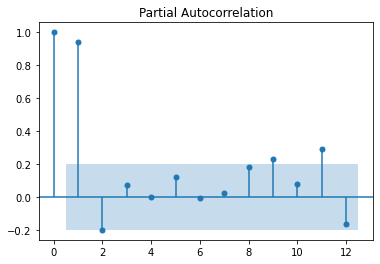

In [40]:
# ACF plots and PACF plots
tsa_plots.plot_acf(Airlines.Passengers, lags=12)
tsa_plots.plot_pacf(Airlines.Passengers, lags=12)
plt.show()

## Evaluation metric MAPE

In [41]:
# MAPE = Mean Absolute Percentage Error
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Exponential Method

In [42]:
ses_model=ses(train['Passengers']).fit(smoothing_level=.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

13.411274740513823

#### Holt Method

In [43]:
h_model=h(train['Passengers']).fit(smoothing_level=.8, smoothing_slope=.2)
pred_h=h_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_h,test.Passengers)

23.530719652100696

#### Holt winter exponential smoothing with additive seasonality and additive trend

In [44]:
hwest_model=es(train['Passengers'], seasonal='add', trend='add', seasonal_periods=12).fit()
pred_hwest=hwest_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwest,test.Passengers)

5.498159718993111

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [45]:
hwemst_model=es(train['Passengers'], seasonal='mul', trend='add', seasonal_periods=12).fit()
pred_hwemst=hwemst_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwemst,test.Passengers)

2.820719538812042

#### Final Model by combining train and test

In [46]:
F_model=es(Airlines['Passengers'], seasonal='mul', trend='add', seasonal_periods=12).fit()

In [47]:
F_model.forecast(10)

96     312.899566
97     308.171544
98     355.533076
99     345.770111
100    345.696443
101    392.471134
102    436.501897
103    429.859792
104    380.173429
105    332.317809
dtype: float64

# ARIMA Model

In [48]:
Airlines_new=pd.read_excel('F:/ExcelR workings/Assignments/Forecasting/Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)

In [49]:
Airlines_new

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


### Some visualizations

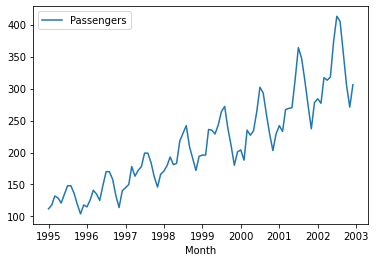

In [50]:
sns.lineplot(data=Airlines_new)
plt.show()

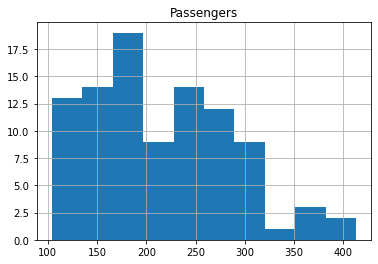

In [51]:
Airlines_new.hist()
plt.show()

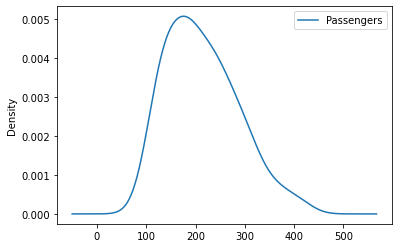

In [52]:
Airlines_new.plot(kind='kde')
plt.show()

### Separate Out Validation Dataset

In [53]:
split_point = len(Airlines_new) - 10
dataset, validation = Airlines_new[0:split_point], Airlines_new[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset2.csv', header=False)
validation.to_csv('validation2.csv', header=False)

Dataset 86, Validation 10


In [54]:
from sklearn.metrics import mean_squared_error as mse

In [55]:
# Load data
train=pd.read_csv("dataset2.csv",header=None, index_col=0, parse_dates=True, squeeze=True)

In [56]:
train.head()

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
Name: 1, dtype: int64

In [57]:
# Preparing data
x=train.values
size = int(len(x) * 0.5)
train, test = x[0:size], x[size:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    yhat =history[-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# Report performance
rmse = np.sqrt(mse(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=230.000000, expected=242.000000
predicted=242.000000, expected=209.000000
predicted=209.000000, expected=191.000000
predicted=191.000000, expected=172.000000
predicted=172.000000, expected=194.000000
predicted=194.000000, expected=196.000000
predicted=196.000000, expected=196.000000
predicted=196.000000, expected=236.000000
predicted=236.000000, expected=235.000000
predicted=235.000000, expected=229.000000
predicted=229.000000, expected=243.000000
predicted=243.000000, expected=264.000000
predicted=264.000000, expected=272.000000
predicted=272.000000, expected=237.000000
predicted=237.000000, expected=211.000000
predicted=211.000000, expected=180.000000
predicted=180.000000, expected=201.000000
predicted=201.000000, expected=204.000000
predicted=204.000000, expected=188.000000
predicted=188.000000, expected=235.000000
predicted=235.000000, expected=227.000000
predicted=227.000000, expected=234.000000
predicted=234.000000, expected=264.000000
predicted=264.000000, expected=302

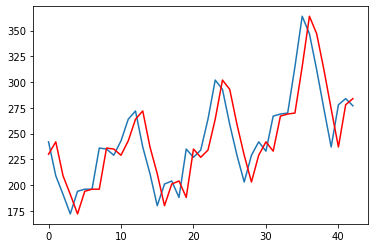

In [58]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Modeling

In [59]:
from statsmodels.tsa.arima_model import ARIMA as a

In [60]:
# Evaluate on Arima model for a given order (p,d,q) and return Rmse
def evaluate_arima_model(x,arima_order):
    x=x.astype('float32') # Preparing training dataset
    train_size=int(len(x)*.50)
    train,test=x[0:train_size],x[train_size:]
    history=[x for x in train]
    pred=list() # Make predictions
    for t in range(len(test)):
        model=a(history,order=arima_order)
        model_fit=model.fit(disp=0) # fitting the model
        yhat=model_fit.forecast()[0]
        pred.append(yhat)
        history.append(test[t])
    rmse=np.sqrt(mse(test,pred))# calculate sample error
    return rmse

In [61]:
# Evaluate combinations of p, d, q values for an ARIMA model
def evaluate_model(dataset, p_values, d_values, q_values):
    dataset=dataset.astype('float32')
    best_score, best_cfg=float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluate_arima_model(train,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f'% (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%3.f' % (best_cfg, best_score))

In [62]:
# Load data
train=pd.read_csv("dataset2.csv",header=None, index_col=0, parse_dates=True, squeeze=True)

In [63]:
# Evaluate parameters using Grid Search
p_values=range(0,5)
d_values=range(0,5)
q_values=range(0,5)
evaluate_model(train.values,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=78.563
ARIMA(0, 0, 1) RMSE=44.789
ARIMA(0, 1, 0) RMSE=25.903
ARIMA(0, 1, 1) RMSE=25.356
ARIMA(0, 1, 2) RMSE=27.772
ARIMA(0, 1, 3) RMSE=23.806
ARIMA(0, 1, 4) RMSE=22.640
ARIMA(0, 2, 0) RMSE=32.474
ARIMA(0, 2, 1) RMSE=26.640
ARIMA(0, 2, 2) RMSE=25.942
ARIMA(0, 2, 3) RMSE=27.914
ARIMA(0, 2, 4) RMSE=25.152
ARIMA(1, 0, 0) RMSE=26.036
ARIMA(1, 0, 1) RMSE=25.282
ARIMA(1, 0, 2) RMSE=350.678
ARIMA(1, 1, 0) RMSE=25.679
ARIMA(1, 2, 0) RMSE=31.603
ARIMA(2, 0, 0) RMSE=25.620
ARIMA(2, 1, 0) RMSE=25.467
ARIMA(2, 2, 0) RMSE=30.414
ARIMA(3, 0, 0) RMSE=25.510
ARIMA(3, 0, 1) RMSE=25.057
ARIMA(3, 1, 0) RMSE=25.648
ARIMA(3, 2, 0) RMSE=30.597
ARIMA(4, 0, 0) RMSE=25.764
ARIMA(4, 1, 0) RMSE=25.344
ARIMA(4, 2, 0) RMSE=29.205
ARIMA(4, 2, 1) RMSE=26.016
Best ARIMA(0, 1, 4) RMSE= 23


In [64]:
# Load data
train=pd.read_csv("dataset2.csv",header=None, index_col=0, parse_dates=True)

In [65]:
x=train.values
x=x.astype('float32')

## Building Model with Best ARIMA parameters

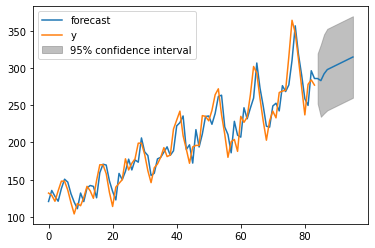

In [66]:
# Fit Model
model=a(x,order=(0, 1, 4))
model_fit= model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(2, 97)
plt.show()

In [67]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   85
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -364.173
Method:                       css-mle   S.D. of innovations             17.179
Date:                Wed, 23 Jun 2021   AIC                            740.345
Time:                        23:36:17   BIC                            755.001
Sample:                             1   HQIC                           746.240
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1167      0.221      9.592      0.000       1.684       2.549
ma.L1.D.y      0.0382      0.110      0.348      0.728      -0.177       0.254
ma.L2.D.y     -0.4030      0.113     -3.577      0.0

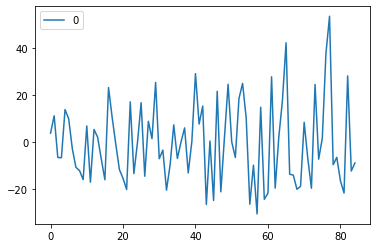

In [68]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

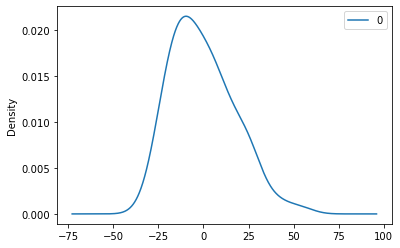

In [69]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [70]:
val=pd.read_csv('validation2.csv',header=None, index_col=0, parse_dates=True)

In [71]:
rmse=np.sqrt(mse(val[1],forecast))
rmse

59.79473133621529

In [72]:
#Forecasting
forecast

array([285.7959193 , 282.9993666 , 292.11238935, 297.78298748,
       299.89968507, 302.01638267, 304.13308027, 306.24977787,
       308.36647546, 310.48317306])